<a href="https://colab.research.google.com/github/iSlidex/P2E1---Deteccion-de-fraudes-en-tarjetas-de-credito/blob/main/P2E1_Detecci%C3%B3n_de_fraudes_en_tarjetas_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto \#2 - Ejercicio \#1 - Detección de fraudes en tarjetas de crédito**

* Ricardo Salvatorelli (C.I.: 26.967.602)
* Leonardo Ruiz (C.I.: 25.209.081)
* José Ramírez (C.I.: 26.902.002)

Este ejercicio consiste en un problema de clasificación en donde a partir de ciertos atributos confidenciales (V1...V28) y un monto, se debe determinar si la transacción realizada en una tarjeta de crédito es un fraude. 

* **1** = Fraude de crédito
* **0** = Transacción normal



# **Setup del Notebook**

Importamos las librerias necesarias y definimos algunas constantes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras
import requests
from io import StringIO

RANDOM_STATE = 74
TEST_SIZE = 0.33
VALIDATION_SIZE=0.1
SCORING = 'binary_crossentropy'
FILE_NAME = 'creditcard.csv'

# **Obtenemos los Datos**

Se obtiene la información a partir del CSV de las transacciones realizadas con tarjetas de crédito utilizando las funcionalidades de pandas.

* Observamos la estructura de la información y un pequeño resumen estadístico.
* Observamos las correlaciones de los atributos y el fraude.
* Observamos algunas gráficas de los atributos más importantes.

In [ ]:
data = pd.read_csv(FILE_NAME)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


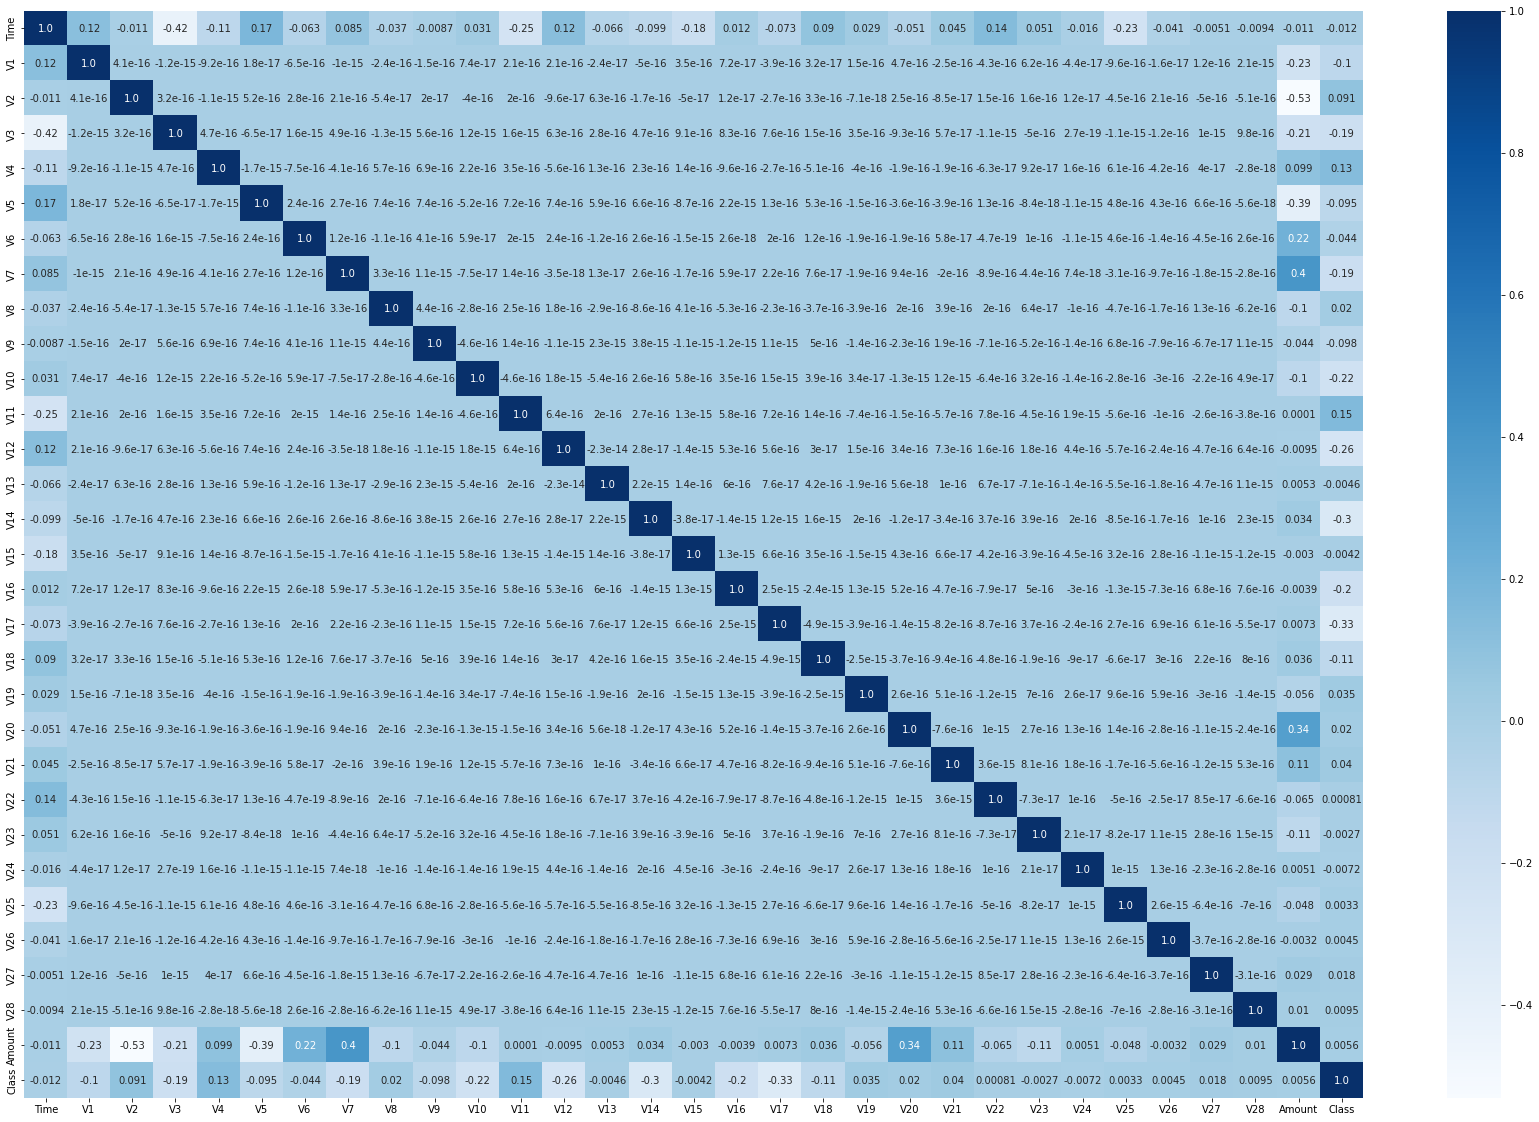

In [ ]:
corr = data.corr()
plt.figure(figsize=(30,20))
sb.heatmap(corr, annot=True, fmt='.2',cmap='Blues')

In [ ]:
corr['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

Observamos que los atributos V17, V14, V12, V10 y V16 tienen un nivel de correlación alto de la clase de fraude con respecto a los otros atributos del dataset. Por lo cual, generamos algunos nuevos atributos a partir de estos.

In [ ]:
data['V17_V14'] = data['V17'] * data['V14']
data['V12_V10'] = data['V12'] * data['V10']
data['V16_V17'] = data['V16'] * data['V17']
data['V17_V12'] = data['V17'] * data['V12']
data['V14_V10'] = data['V14'] * data['V10']

Volvemos a observar las correlaciones.

In [ ]:
corr = data.corr()
corr['Class'].abs().sort_values(ascending=False)

Class      1.000000
V12_V10    0.548557
V16_V17    0.544650
V17_V12    0.542797
V17_V14    0.542507
V14_V10    0.525750
V17        0.326481
V14        0.302544
V12        0.260593
V10        0.216883
V16        0.196539
V3         0.192961
V7         0.187257
V11        0.154876
V4         0.133447
V18        0.111485
V1         0.101347
V9         0.097733
V5         0.094974
V2         0.091289
V6         0.043643
V21        0.040413
V19        0.034783
V20        0.020090
V8         0.019875
V27        0.017580
Time       0.012323
V28        0.009536
V24        0.007221
Amount     0.005632
V13        0.004570
V26        0.004455
V15        0.004223
V25        0.003308
V23        0.002685
V22        0.000805
Name: Class, dtype: float64

Observamos que en efecto los nuevos atributos creados tienen un nivel de correlación mucho mas elevado que los atributos originales, por lo tanto se utilizarán los mismos para mejorar la precisión del módelo de redes neuronales a utilizar.

Definimos una función para crear gráficas de caja y bigote rápidamente.

In [ ]:
def create_boxplot(data, column):
    f, axe = plt.subplots(1, 1,figsize=(18,5))
    axe.ticklabel_format(style='plain', axis='both')
    sb.despine(left=True, bottom=True)
    sb.boxplot(x=data[column],y=data['Class'], ax=axe)
    axe.yaxis.tick_left()
    axe.set(xlabel=column, ylabel='Class')

Observamos algunas gráficas que definen el comportamiento de la información.

En esta gráfica podemos visualizar que la mayoria de los fraudes de tarjeta de crédito ocurren en transacciones con montos bajos.

([<matplotlib.axis.XTick at 0x7fb0f7496810>,
 <a list of 2 Text major ticklabel objects>)

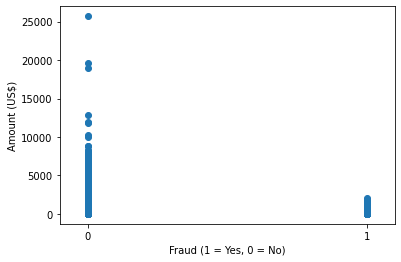

In [ ]:
plt.scatter(data['Class'], data['Amount'])
plt.xlabel('Fraud (1 = Yes, 0 = No)')
plt.ylabel('Amount (US$)')
plt.xlim(-0.1, 1.1)
plt.xticks([0, 1])

Generamos gráficas de Caja y Bigote de algunos de los atributos mas importantes con respecto al fraude.

In [ ]:
#create_boxplot(data, 'Amount')

In [ ]:
#create_boxplot(data, 'V17')

In [ ]:
#create_boxplot(data, 'V14')

In [ ]:
#create_boxplot(data, 'V12')

In [ ]:
#create_boxplot(data, 'V10')

In [ ]:
#create_boxplot(data, 'V16')

Por último, observamos la proporción de casos de fraude contra la proporción de casos de transacciones normales en el dataset. En donde visualizamos que solamente un 0,0017% de las mismas son clasificadas como fraude en nuestro dataset.

0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


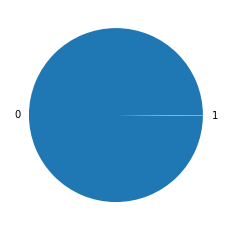

In [ ]:
plt.pie(data['Class'].value_counts(), labels=[0, 1])
print(data['Class'].value_counts(normalize=True))
print(data['Class'].value_counts())

# **Separamos los conjuntos de prueba y de entrenamiento de manera estratificada**

Hacemos uso de StratifiedShuffleSplit para separar los conjuntos de entrenamiento y de prueba, estratificando la información para lograr representar mejor la información.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE)

for train_index, test_index in split.split(data, data["Class"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

print(f'Cantidad de filas en conjunto de entrenamiento {len(train_set)}.')
print(f'Cantidad de filas en conjunto de prueba {len(test_set)}.')
print(f'% de filas en conjunto de entrenamiento {(len(train_set)/len(data)) * 100:.2f}.')
print(f'% de filas en conjunto de prueba {(len(test_set)/len(data)) * 100:.2f}.')

print('\nDistribución de data "Class" en conjunto de entrenamiento:')
print(train_set['Class'].value_counts() / len(train_set))

print('\nDistribución de data "Class" en conjunto de prueba:')
print(test_set['Class'].value_counts() / len(test_set))

Cantidad de filas en conjunto de entrenamiento 190820.
Cantidad de filas en conjunto de prueba 93987.
% de filas en conjunto de entrenamiento 67.00.
% de filas en conjunto de prueba 33.00.

Distribución de data "Class" en conjunto de entrenamiento:
0    0.998271
1    0.001729
Name: Class, dtype: float64

Distribución de data "Class" en conjunto de prueba:
0    0.998276
1    0.001724
Name: Class, dtype: float64


Generamos adicionalmente, un conjunto de validación en nuestro conjunto de entrenamiento de manera estratificada.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)
for train_index, valid_index in split.split(train_set, train_set["Class"]):
    train_set = data.loc[train_index]
    valid_set = data.loc[valid_index]

print(f'Cantidad de filas en conjunto de entrenamiento {len(train_set)}.')
print(f'Cantidad de filas en conjunto de validación {len(valid_set)}.')
print(f'% de filas en conjunto de entrenamiento {(len(train_set)/len(train_set + valid_set)) * 100:.2f}.')
print(f'% de filas en conjunto de validación {(len(valid_set)/len(train_set + valid_set)) * 100:.2f}.')

print('\nDistribución de data "Class" en conjunto de entrenamiento:')
print(train_set['Class'].value_counts() / len(train_set))

print('\nDistribución de data "Class" en conjunto de validación:')
print(valid_set['Class'].value_counts() / len(valid_set))

Cantidad de filas en conjunto de entrenamiento 171738.
Cantidad de filas en conjunto de validación 19082.
% de filas en conjunto de entrenamiento 90.00.
% de filas en conjunto de validación 10.00.

Distribución de data "Class" en conjunto de entrenamiento:
0    0.998032
1    0.001968
Name: Class, dtype: float64

Distribución de data "Class" en conjunto de validación:
0    0.998218
1    0.001782
Name: Class, dtype: float64


# **Creamos las Redes Neuronales**